# Analyzing 2013 Election Manifestos for Pakistani Political Parties through Natural Language Processing


### Amir Akhter Kazi



## Goal:
- Analyzing 2013 election manifestos for 6 different Pakistani political parties, to understand policy stances, issue prioritization etc.
- Visualizing key areas for voter assistance, such as creating Word Clouds to highlight most frequent high priority words in each manifesto, plotting manifesto sentiment graphs indicating 'doom and gloom' vs 'optimism and hope' strategies for each party.
- Doing a proxy test for the 'Median Voter Theorem' by analyzing text similarity across different manifestos, to see how different parties are - at least in how they portray themselves in their manifestos. 




##### The code does the following things:
- Reads each Manifesto text file and creates a ‘Manifesto’ Class (Object Oriented Programming)
- Creates Word Tokens 
- Creates Sentence Tokens 
- Finds Word Frequency in each text file 
- Parts of Speech tagging 
- Creates a 'stemmed list' for the tokens 
- Pre-processes to remove stop words & converts to lower case to avoid repetition
- Finds any top K number of most frequent words in each text file
- Creates a word cloud of any given text, for any optional number of words
- Summarizes text from any text file
- Creates n-grams of any length, and presents any X most common n-grams
- Calculates document similarity between any two manifestos
- Calculates sentence sentiment (polarity & subjectivity) & plots sentiment graphs

##### The following Python packages were used in this program:
- NLTK
- Gensim
- Word Cloud
- Matplotlib
- Collections
- Spacy
- TextBlob

In [196]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk import pos_tag
from nltk.util import ngrams   

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from gensim.summarization.summarizer import summarize
from collections import Counter
import spacy
from textblob import TextBlob



class Manifesto(object):
    '''
    Creates a Manifesto object.
    Can be used to assess different aspects of a text file
        including tokens, most common words, parts of speech.
    '''
    
    
    
    def __init__(self, file_path, name):
        '''
        Initializes the object variables.
        '''
        self.name = name
        self.text = self.reading_file (file_path)
        self.tokens = self.tokenize (self.text)
        self.sentence_tokens = token_sentences(self.text)
        self.filtered_text = self.preprocessing (self.tokens)
        self.stemmed_list = self.stemmer(self.filtered_text)
        self.pos_tags = self.parts_of_speech_tagging(self.tokens)
        self.word_frequency = self.finding_word_frequency(self.filtered_text)
        
    
    def reading_file (self, file_path):
        '''
        Given a file path, checks if file exists there, reads it, closes it,
            and returns the text as a string.

        Input:
            file_path: string

        Return:
            text: string
        '''
        assert os.path.exists(file_path), "File not found at: "+str(file_path)
        f = open(file_path,'r')    
        text = f.read()
        f.close()
        return text
        
        
    def tokenize (self, text):
        '''
        Given some text, will return tokens of that text
        
        Input: 
            text: string
        Output:
            token: list of string
        '''
        tokens = nltk.word_tokenize(text)
        return tokens
    
    
    def token_sentences(self, text):
        '''
        Given some text, will return sentence tokens of that text
        
        Input:
            text: string
        
        Output:
            list of sentence tokens (string)
        '''
        sent_text = nltk.sent_tokenize(text)
        return sent_text

        
    def finding_word_frequency (self, filtered_text):
        '''
        Given a list, returns the word frequency
        
        Input:
            filtered_text: list of strings
        Output:
            word frequency: nltk.probability.FreqDist
        '''
        word_frequency = nltk.FreqDist(filtered_text)
        return word_frequency
        
        
    def parts_of_speech_tagging(self, tokens):
        '''
        Given tokens, assigns parts of speech to each token
        
        '''
        tagged = nltk.pos_tag(tokens)
        return tagged      
        
        
    def stemmer (self, filtered_text):
        '''
        Does stemming/lemmatization of a given text
        Input:
            filtered_text: list of string
            
        Output:
            a set of stemmed words
        '''
        st = RSLPStemmer()
        stemmed_list = set(st.stem(token) for token in filtered_text)
        return stemmed_list
        
        
        
    def preprocessing (self, text):
        '''
        Removes stop words and converts to lower case.
        
        Input:
            text: string
            
        Output:
            filtered_text: list of string
        '''
        stop_words = set(stopwords.words('english'))
        words=[word.lower() for word in text if word.isalpha()]
        filtered_text = [w for w in words if not w in stop_words]
        return filtered_text

    
        
    def find_most_frequent_words(self, number):
        '''
        For a given manifesto object, returns the most common X number of words used
            along with the count
            
        Input:
            number: integer
            
        Output:
            mostcommon: list
        '''
        wordfreqdist = nltk.FreqDist(self.filtered_text)
        mostcommon = wordfreqdist.most_common(number)
        return mostcommon
        
        
        
    def __repr__(self):
        
        return (self.name + ' Manifesto ')
    
    
    
    
def create_wordcloud(text, title = None, maximum_words = 100):
    '''
    Creates a word cloud based on the text of the file.
    Removes stop words (which consists of conventional stop words  
            and words from my own list)
            
    Input:
        text (string)
        title (optional, string)
        maximum words (integer, default = 100)
        

    Special thanks to the community at stackoverflow
    (https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python)
    for this one!
    '''
    stop_words = list(STOPWORDS)
    personal_list = ['pakistan', 'people', 'party', 'manifesto', 'government', 'per', 
                    'cent', 'will', 'Parliamentarians', 'ANP', 'MQM', 'iii', 'i', 'ii', 'iv', 'v', 
                     'vi','vii', 'PML', 'PTI', 'ensure', 'right', 'provide', 'islami', 'Islami', 'jamaat', 'Jamaat' ]
    stop_words_2 = set(stop_words + personal_list)


    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words_2,
        max_words=maximum_words,
        scale=3,
        max_font_size=40
    ).generate(str(text))

    fig = plt.figure(1, figsize=(20, 20), dpi = 400)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=30)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
def summarize_text (text):
    '''
    Given some text, will summarize it and return the summary
        
    Input:
        text (string)
    Output:
        summary (string)
    '''
    print (summarize(text))


def getting_ngrams(text, gram_type, length_of_list):
    '''
    Given a text, given the type of gram (example, bigram, trigram, fourgram etc), and given length of list,
        returns a list of the most common X ngrams in that text. 
        
    Input:
        text (string)
        gram_type (integer): indicates the number of grams
        length_of_list (integer): indicates the number of most common ngrams to show
    
    Output:
        ngram (list of string)
        
    Thanks to the Stackoverflow community at 
    https://stackoverflow.com/questions/32441605/generating-ngrams-unigrams-bigrams-etc-from-a-large-corpus-of-txt-files-and-t
    for help with this!
    '''
    gram = ngrams(text, gram_type)
    ngram = Counter(gram).most_common(length_of_list)
    print (ngram)



def manifesto_similarities():
    '''
    Prints similarity score between the manifestos of different parties using manifesto text.
    Uses package 'spacy' to calculate similarity
    
    '''
    nlp = spacy.load('en')
    list_of_parties = [ppp, pmln, mqm, pti, anp, ji]
    tokens = [nlp(ppp.text), nlp(pmln.text), nlp(mqm.text), nlp(pti.text), nlp(anp.text), nlp(ji.text)]

    counter_1 = 0
    print ('{} {:>30} {:>40}'.format('PARTY 1', 'PARTY 2','SIMILARITY SCORES'))
    print ()
    for token1 in tokens:    
        counter_2 = 0
        for token2 in tokens:
            print ('{:30} {:30} {:.5}'.format(list_of_parties[counter_1].name, list_of_parties[counter_2].name,token1.similarity(token2) ))
            counter_2 = counter_2 + 1
        counter_1 = counter_1 + 1
        print ()
        
        
def sentiment_analysis (sentence_tokens, name):
    '''
    Given sentence tokens, calculates polarity and subjectivity of each sentence in the document,
        and plots graphs of polarity and subjectivity
        
    Input:
        sentence_tokens: list of strings
        name: the name of each party (string)
    
    '''
    polarity = []
    subjectivity = []
    for sentence in sentence_tokens:
        s = TextBlob(sentence)
        polarity.append(s.sentiment[0])
        subjectivity.append(s.sentiment[1])
        
    plt.plot(polarity)
    plt.xlabel('Sentences across manifesto')
    plt.ylabel('Polarity')
    plt.title(' Manifesto of '+ name)
    plt.show()


    plt.plot(subjectivity, 'C7')
    plt.xlabel('Sentences across manifesto')
    plt.ylabel('subjectivity')
    plt.title(' Manifesto of '+ name)
    plt.show()

In [167]:
# CREATING MANIFESTO OBJECTS OF THE POLITICAL PARTIES

ppp = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/PPP_2013.txt', 'Pakistan Peoples Party')
pmln = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/PMLN_2013.txt', 'Pakistan Muslim League N')
mqm = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/MQM_2013.txt', 'Mutahhida Qaumi Movement')
pti = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/PTI_2013.txt', 'Pakistan Tehreek-e-Insaaf')
anp = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/ANP_2013.txt', 'Awami National Party')
ji = Manifesto ('/Users/kazi/Desktop/Manifesto Text Files/JI_2013.txt', 'Jamat-ul-Islami')

In [137]:
list_of_parties = [ppp, pmln, mqm, pti, anp, ji]

### TEXT STATISTICS

I first explored the texts to see how many different word tokens are present in each manifesto. This was done to assess the length of each manifesto, and gain an understanding of how much time it might take a voter to read each of these (relative to each other). 


In [145]:
# Finding Number of Tokens in Each Party Manifesto
print ('{:30} {}'.format('PARTY', 'NUMBER OF TOKENS IN PARTY MANIFESTO') )
for party in list_of_parties:
    print ('{:30} {}'.format (party.name,  len(party.tokens)))


PARTY                          NUMBER OF TOKENS IN PARTY MANIFESTO
Pakistan Peoples Party         45796
Pakistan Muslim League N       24888
Mutahhida Qaumi Movement       9159
Pakistan Tehreek-e-Insaaf      9009
Awami National Party           8790
Jamat-ul-Islami                10950


I then did the same token count, but for unique words in each text, by converting uppercase to lowercase (to avoid repetition), and removing stop words such as ‘the’, ‘is’ etc.


In [148]:
# Finding Unique Words in Each Manifesto (Excludes Stop Words)
print ('{:30} {}'.format('PARTY', 'NUMBER OF UNIQUE IMPORTANT WORDS IN PARTY MANIFESTO') )
for party in list_of_parties:
    print ('{:30} {}'.format (party.name,  len(party.filtered_text)))

PARTY                          NUMBER OF UNIQUE IMPORTANT WORDS IN PARTY MANIFESTO
Pakistan Peoples Party         23124
Pakistan Muslim League N       12663
Mutahhida Qaumi Movement       4866
Pakistan Tehreek-e-Insaaf      4813
Awami National Party           4521
Jamat-ul-Islami                5889



Lastly, a similar analysis was done to find the number of sentences in each manifesto.


In [150]:
# Finding number of sentences in Each Manifesto
print ('{:30} {}'.format('PARTY', 'NUMBER OF SENTENCES IN PARTY MANIFESTO') )
for party in list_of_parties:
    print ('{:30} {}'.format (party.name,  len(party.sentence_tokens)))

PARTY                          NUMBER OF SENTENCES IN PARTY MANIFESTO
Pakistan Peoples Party         1720
Pakistan Muslim League N       1007
Mutahhida Qaumi Movement       504
Pakistan Tehreek-e-Insaaf      264
Awami National Party           598
Jamat-ul-Islami                769


These indicated that for the most part, similar trends remained across the three analyses. Interestingly, while the Pakistan Tehreek-e-Insaaf (PTI) had more words than either the Awami National Party (ANP) or Jamat-ul-Islami (JI), it had less than half as many sentences. What makes this interesting is that at the time of the 2013 elections, the PTI was targeting urban middle class voters. This might be indicative in the sort of phrasing and vocabulary they were using, with longer sentences and more complicated phrasing (or maybe I'm giving them too much credit). 

To further probe this observation, I divided the length of the ‘filtered text’ i.e. text after pre-processing by the number of sentence tokens. 


In [154]:
# Finding average number of words per sentence in Each Manifesto
print ('{:30} {}'.format('PARTY', 'AVERAGE NUMBER OF WORDS PER SENTENCE IN PARTY MANIFESTO') )
for party in list_of_parties:
    print ('{:30} {}'.format (party.name,  len(party.filtered_text)/len(party.sentence_tokens)))

PARTY                          AVERAGE NUMBER OF WORDS PER SENTENCE IN PARTY MANIFESTO
Pakistan Peoples Party         13.444186046511629
Pakistan Muslim League N       12.574975173783516
Mutahhida Qaumi Movement       9.654761904761905
Pakistan Tehreek-e-Insaaf      18.231060606060606
Awami National Party           7.5602006688963215
Jamat-ul-Islami                7.657997399219766


Those results further highlighted this trend. While more research needs to be done on this, it is possible that manifesto sentence lengths vary depending on who the party’s target demographic is. 

### WORD FREQUENCY & POSITIONING

##### MOST FREQUENT WORDS

In [209]:
for party in list_of_parties:
    print (party.name)
    print (party.find_most_frequent_words( 10))
    print ('\n')

Pakistan Peoples Party
[('pakistan', 365), ('party', 269), ('people', 233), ('government', 171), ('national', 132), ('health', 107), ('new', 102), ('development', 98), ('programme', 97), ('policy', 97)]


Pakistan Muslim League N
[('pakistan', 119), ('n', 116), ('pml', 113), ('national', 77), ('sector', 76), ('government', 70), ('development', 66), ('shall', 65), ('education', 61), ('system', 60)]


Mutahhida Qaumi Movement
[('mqm', 87), ('pakistan', 51), ('government', 39), ('sector', 33), ('local', 32), ('public', 32), ('system', 29), ('people', 28), ('ii', 23), ('iii', 22)]


Pakistan Tehreek-e-Insaaf
[('pti', 42), ('would', 37), ('economic', 33), ('policy', 31), ('government', 29), ('system', 29), ('national', 29), ('education', 28), ('development', 27), ('ensure', 24)]


Awami National Party
[('anp', 166), ('ensure', 49), ('women', 39), ('shall', 34), ('health', 33), ('rights', 33), ('development', 33), ('elections', 30), ('manifesto', 29), ('education', 29)]


Jamat-ul-Islami
[('

##### PARTS OF SPEECH TAGGING

In [203]:
# Prints out Parts of Speech Tagging for each token in each manifesto
for party in list_of_parties:
    print (party.name)
    print ('\n  ')
    print (party.pos_tags)
    print ('\n  \n \n \n ')

Pakistan Peoples Party

  
[('\ufeff', 'NN'), ('Manifesto', 'NNP'), ('2013', 'CD'), ('We', 'PRP'), ('badly', 'RB'), ('need', 'VBP'), ('to', 'TO'), ('gather', 'VB'), ('our', 'PRP$'), ('thoughts', 'NNS'), ('and', 'CC'), ('clear', 'JJ'), ('our', 'PRP$'), ('minds', 'NNS'), ('.', '.'), ('We', 'PRP'), ('need', 'VBP'), ('a', 'DT'), ('political', 'JJ'), ('ceasefire', 'NN'), ('without', 'IN'), ('conceding', 'VBG'), ('ideological', 'JJ'), ('territory', 'NN'), ('.', '.'), ('Quaid-e-Awam', 'JJ'), ('Shaheed', 'NNP'), ('Zulfikar', 'NNP'), ('Ali', 'NNP'), ('Bhutto', 'NNP'), (',', ','), ('Founder', 'NNP'), ('Chairman', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Pakistan', 'NNP'), ('People', 'NNP'), ('’', 'NNP'), ('s', 'NNP'), ('Party', 'NNP'), (',', ','), ('President', 'NNP'), ('and', 'CC'), ('Prime', 'NNP'), ('Minister', 'NNP'), ('of', 'IN'), ('Pakistan', 'NNP'), ('Pakistan', 'NNP'), ('People', 'NNP'), ('’', 'NNP'), ('s', 'VBD'), ('Party', 'NNP'), ('Parliamentarians', 'NNPS'), ('Contents', 'NNPS'), ('Cor

##### N-GRAMS

I also wanted to find the top N-grams mentioned in each manifesto. This was to see if there were any terms of phrases  which were important enough to be mentioned contiguously a significant number of times. For my analysis, I looked into tri-grams (n-grams of size 3), and I restricted the results to the top 10 tri-grams for each manifesto, for prioritization reasons.

In [185]:
# Finding top K N-grams for each text document
for party in list_of_parties:
    print (party.name)
    getting_ngrams(party.filtered_text, 3, 10)
    print ('\n  ')

Pakistan Peoples Party
[(('pakistan', 'people', 'party'), 87), (('people', 'party', 'parliamentarians'), 86), (('party', 'parliamentarians', 'manifesto'), 31), (('shaheed', 'mohtarma', 'benazir'), 25), (('mohtarma', 'benazir', 'bhutto'), 25), (('parliamentarians', 'manifesto', 'manifesto'), 25), (('benazir', 'income', 'support'), 20), (('income', 'support', 'programme'), 20), (('billion', 'us', 'dollars'), 20), (('per', 'cent', 'gdp'), 19)]

  
Pakistan Muslim League N
[(('pml', 'n', 'government'), 15), (('pml', 'n', 'fully'), 7), (('pml', 'n', 'ensure'), 6), (('pml', 'n', 'achievements'), 6), (('democratic', 'governance', 'requires'), 4), (('tax', 'gdp', 'ratio'), 4), (('public', 'private', 'sector'), 4), (('public', 'private', 'sectors'), 4), (('fuel', 'cell', 'technology'), 4), (('investment', 'gdp', 'ratio'), 3)]

  
Mutahhida Qaumi Movement
[(('local', 'government', 'system'), 7), (('mqm', 'proposes', 'following'), 7), (('women', 'children', 'non'), 3), (('children', 'non', 'musli

The PPP manifesto tri-grams result was true to how PPP generally campaigns in an election, by repeatedly mentioning the names of its previous late leaders, such as Benazir Bhutto. The PMLN tri-grams reflected its pro-business image. PTI was interestingly the only one to mention population growth rate, in a country with an over-population problem, while the ANP talked abouts its main voter bank areas such as the Federally Administered Tribal Areas. THe JI's most popular tri-gram echoed their religious position by highlighting the need for interest free loans. 

### WORD CLOUDS

Next, to highlight the key issues for each political party (as represented by the frequency with which each word was stated), I have made a Word Cloud representing each party’s manifesto. This uses the text, and preprocessing it to remove stop words. It also removes certain words which are likely to be said with high frequency but do not add much insight, for example, ‘Pakistan’. 
This WordCloud uses, as a default, the most frequent 50 words. However, that can be changed to a different number.

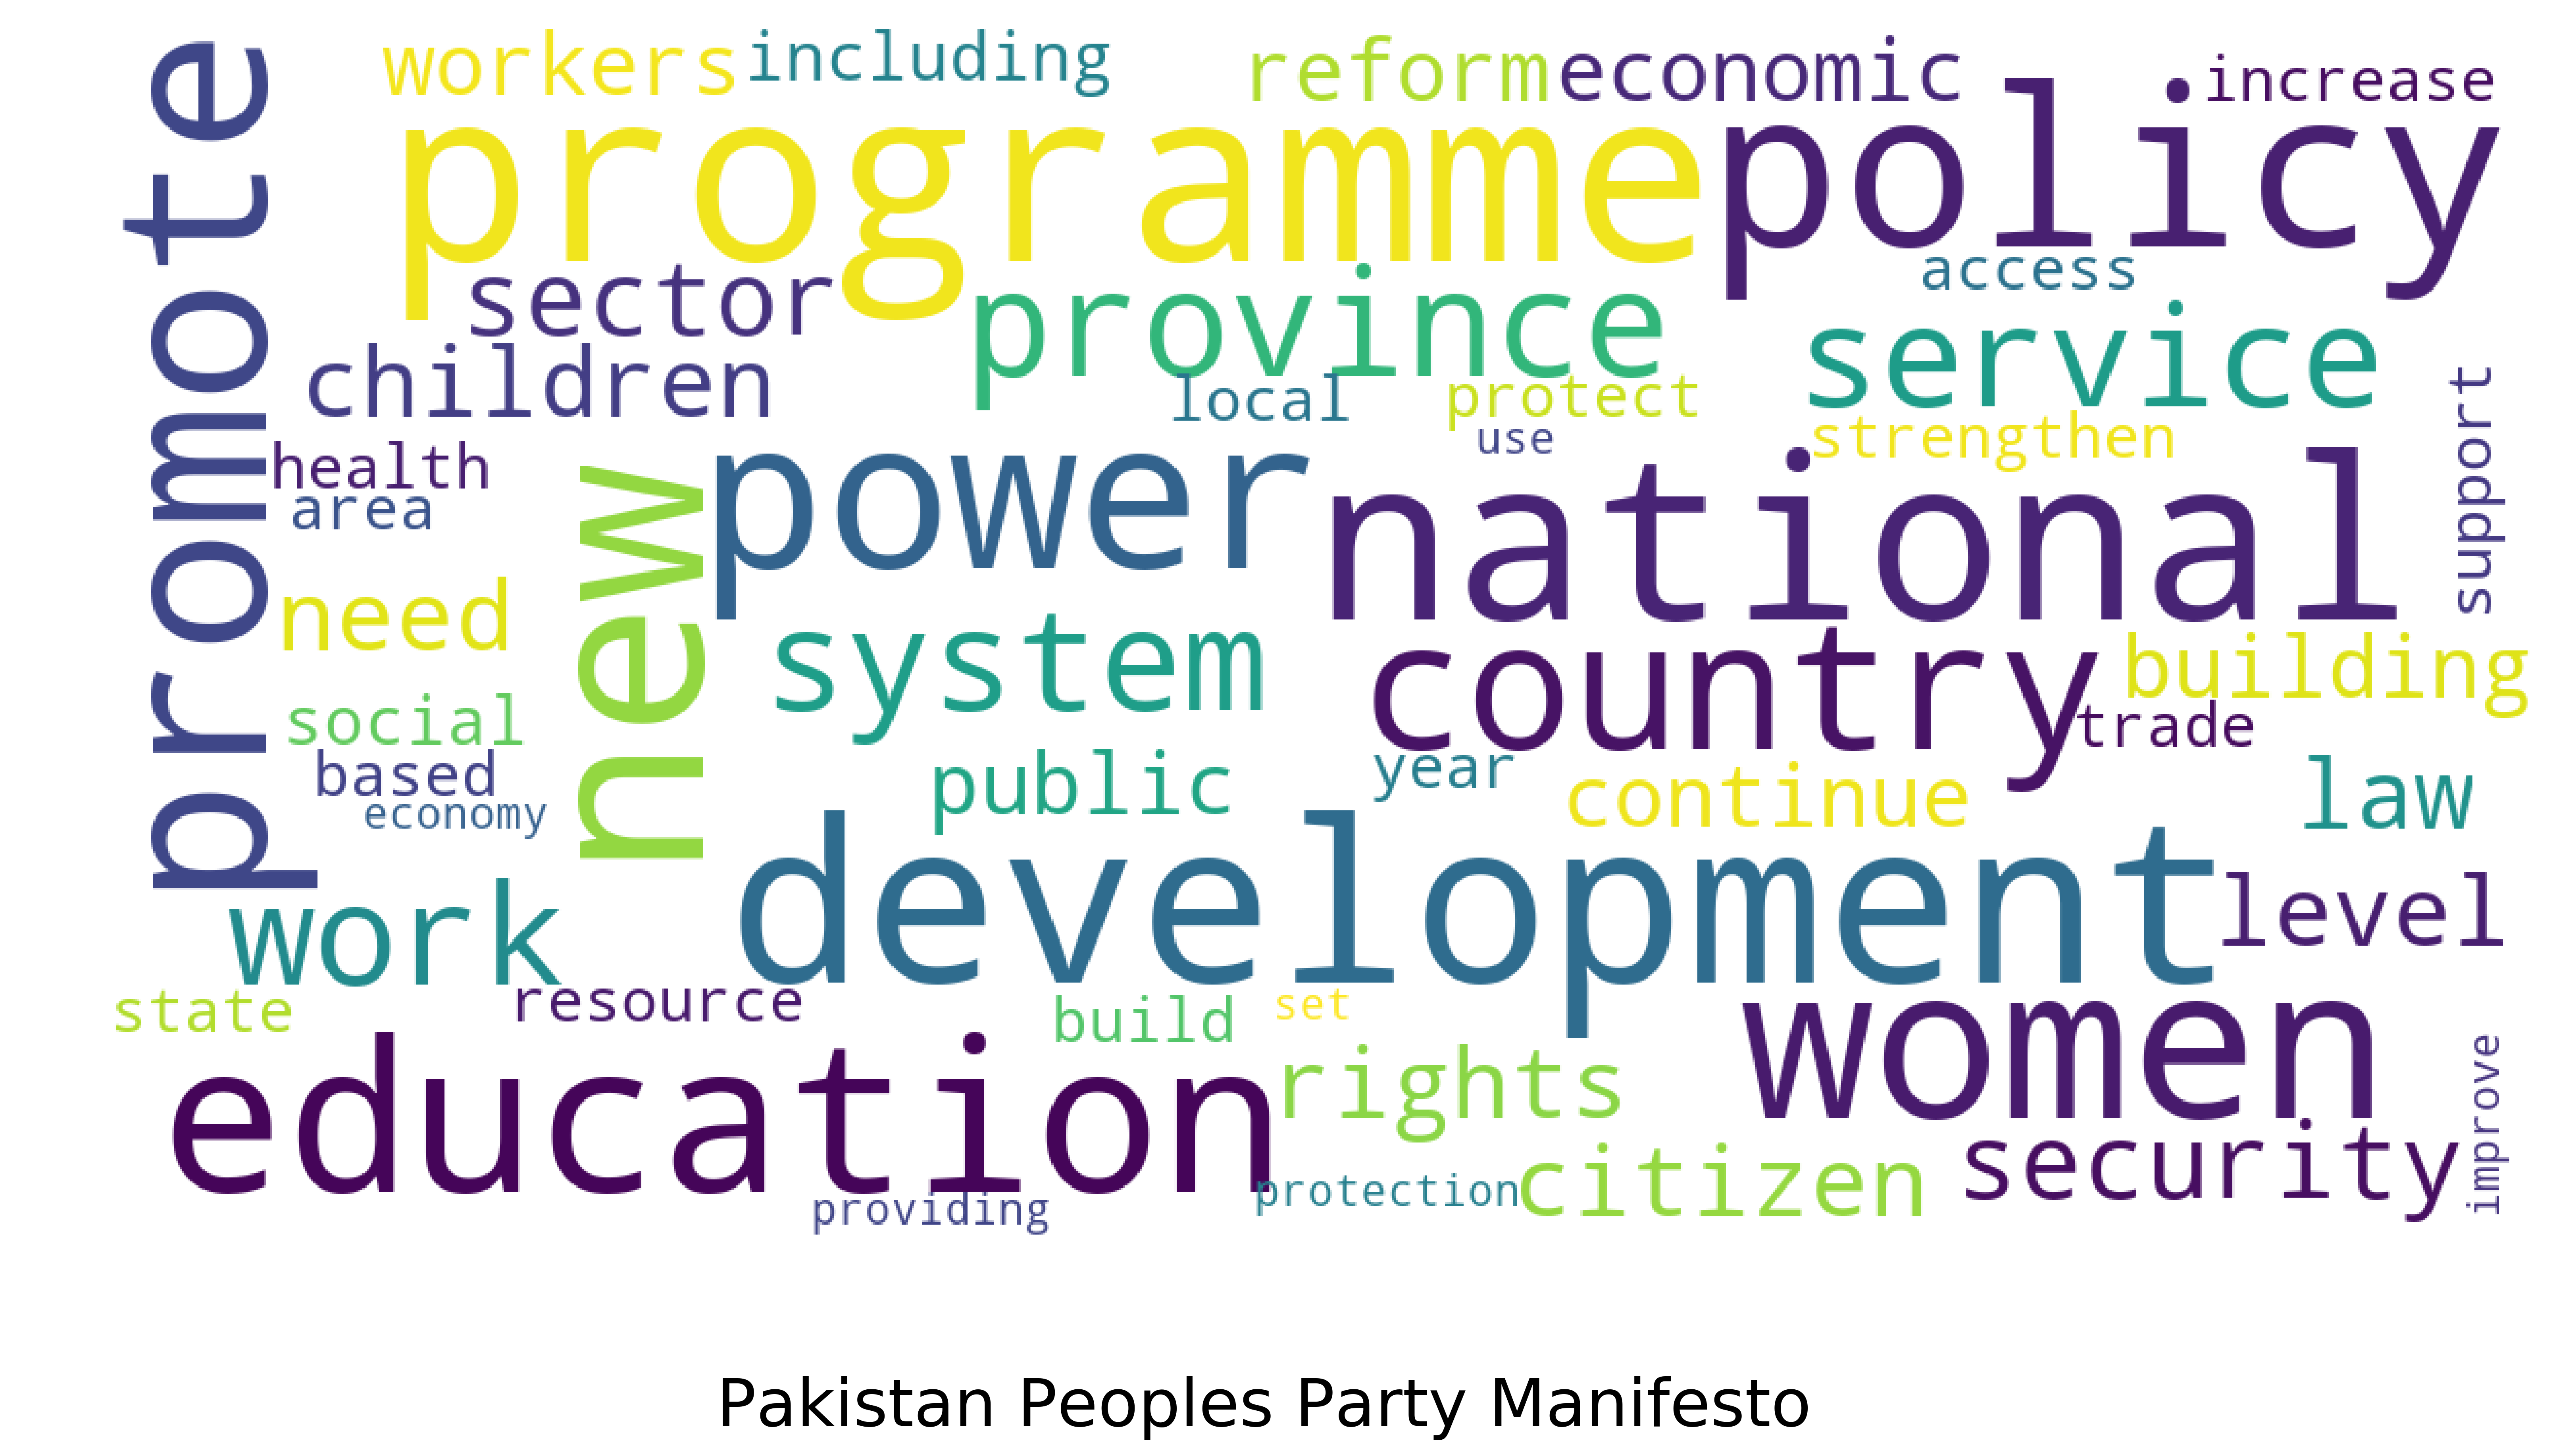

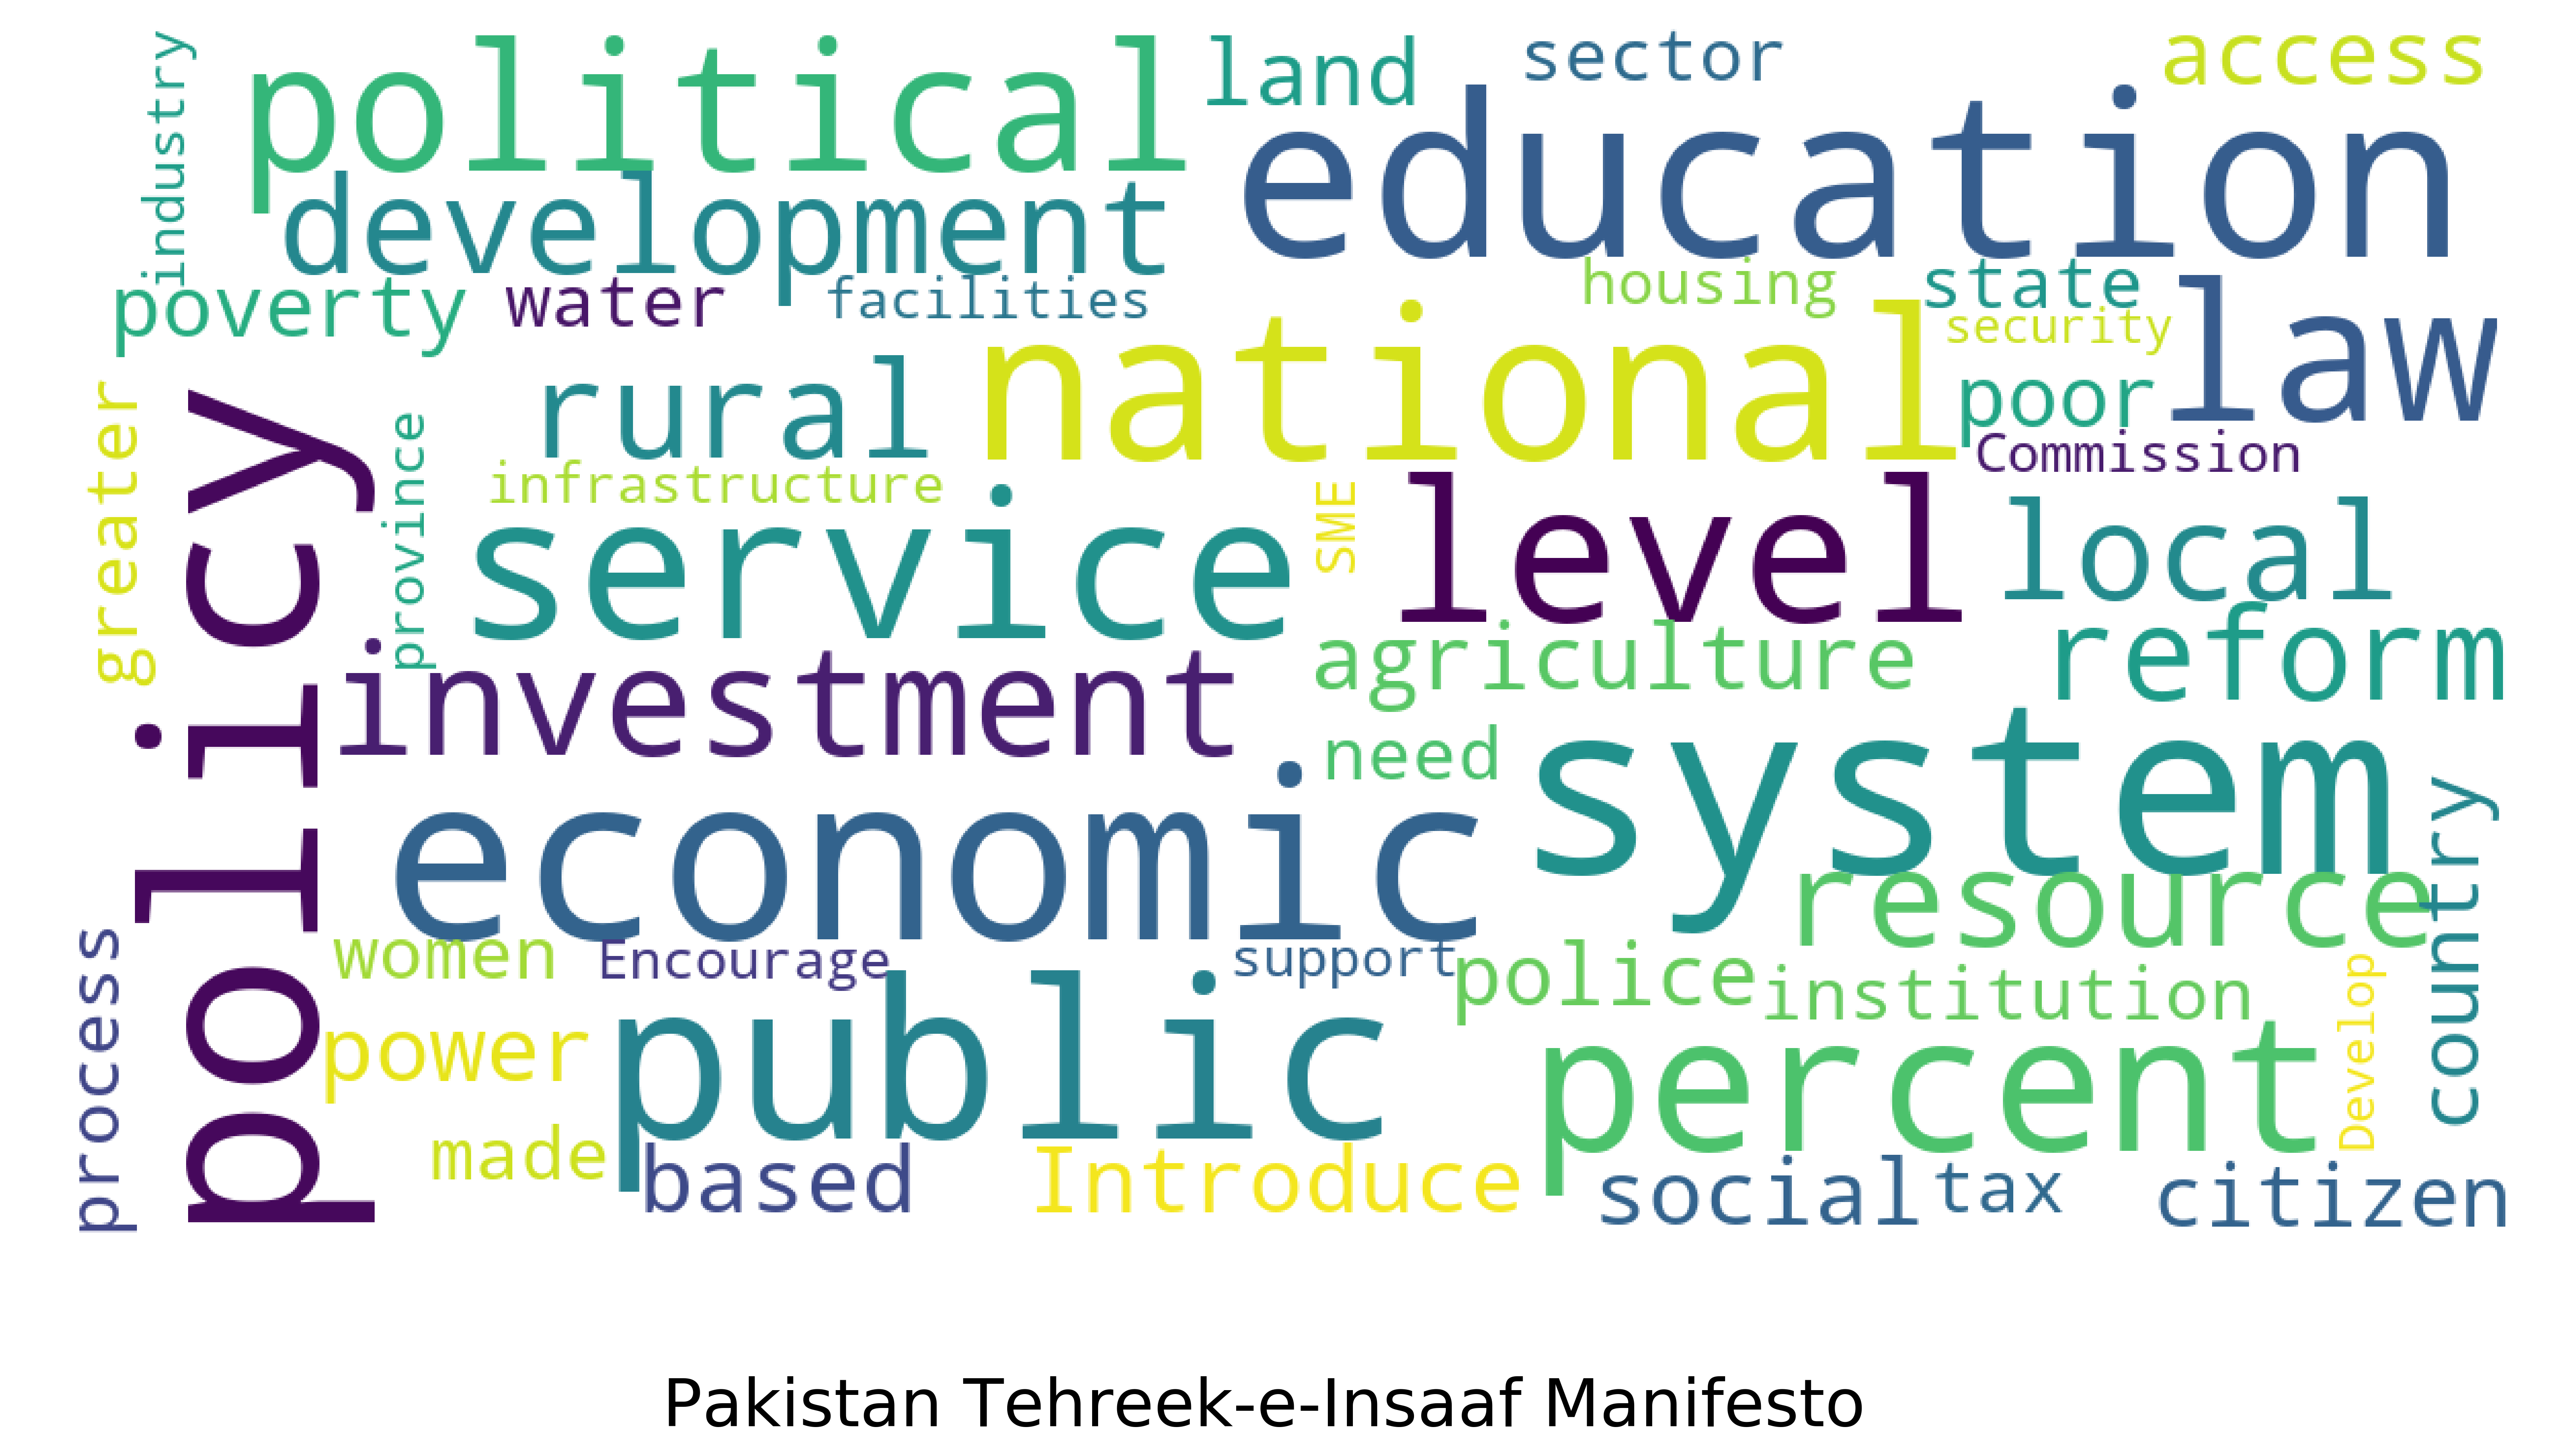

In [170]:
# Creates Word Clouds for each political party manifesto, displaying the top 50 most frequent words by size

for party in list_of_parties:
    create_wordcloud(party.text, title = party.name + ' Manifesto', maximum_words = 50)
    print ( '\n \n \n' )

The first very clear observation was that the WordCloud for Pakistan Peoples Party's (PPP) Manifesto  mirrored their motto of 'Food, Clothing, Shelter' with words such as education, health, economy, workers etc. most common. It also highlighted policies that the PPP had been in favor of during its previous tenure.

The Pakistan Muslim League N (PMLN) portrays itself as the 'business and agriculture friendly' party, and evidence of that could be seen in its high frequency usage of terms such as investment, technology, energy, water, agriculture, tax, market etc.

The Mutahhida Qaumi Movement is more of a city based party rather than a national party, and it was interesting to see how the WordCloud reflected that, with words such as local and district being used. Considering the security situation of the city where its vote bank is mainly from, it also highlighted key words such as urban, law, power, security, police etc.

The most interesting observation was that for all the parties, despite their different political leanings and different vote banks, they all mentioned the same key points such as economy, education, health, women rights etc. However, while all of them menntioned such things, they do have different views on them, especially in the case of the hard right conservative parties such as the Jamaat-ul-Islami. This nuance may have been possibly lost in this Word Cloud analysis.

Caveat:
It's worth noting how much of these insights would be seen if one did not have domain knowledge about this subject. 

### SIMILARITY MEASURE

Since the above Word Clouds only displayed the top 50 words on each manifesto, it did not give an accuracte depiction of how similar the entire manifestos are to each other. To explore that, I did the following:

In [171]:
manifesto_similarities()

PARTY 1                        PARTY 2                        SIMILARITY SCORES

Pakistan Peoples Party         Pakistan Peoples Party         1.0
Pakistan Peoples Party         Pakistan Muslim League N       0.99367
Pakistan Peoples Party         Mutahhida Qaumi Movement       0.99199
Pakistan Peoples Party         Pakistan Tehreek-e-Insaaf      0.99
Pakistan Peoples Party         Awami National Party           0.9657
Pakistan Peoples Party         Jamat-ul-Islami                0.94222

Pakistan Muslim League N       Pakistan Peoples Party         0.99367
Pakistan Muslim League N       Pakistan Muslim League N       1.0
Pakistan Muslim League N       Mutahhida Qaumi Movement       0.99516
Pakistan Muslim League N       Pakistan Tehreek-e-Insaaf      0.98727
Pakistan Muslim League N       Awami National Party           0.96907
Pakistan Muslim League N       Jamat-ul-Islami                0.95021

Mutahhida Qaumi Movement       Pakistan Peoples Party         0.99199
Mutahhida Qaumi Mov

The scores indicate how similar two manifestos are, with 1.0 being the highest, and 0.0 being the lowest. Naturally, a manifesto is completely similar to itself, hence explaining the 1.0s in the similarity score column.

The most intriguing thing to notice is that the three parties which were top 3 in the 2013 elections (PMLN, PPP and PTI) have over a 98% match in their manifestos. Not only that, the other parties also have manifestos that are above 95% similar. The only exception being the JI manifesto, however that could be attributed to the initial source errors in the text, which were mentioned at the start. If we are to take manifestos at face values as the main decider for the Pakistani electorate (which is not necessarily, or even remotely true), then that serves as support for the 'Median Voter Theorem' which, in this context, has implications that parties will try to allign themselves to be most preferable to the median voter. Clearly, in this case, all the parties have tried to allign their manifestos to a similar 'common' point to appease to the highest number of voters. 

### SENTIMENT ANALYSIS

Lastly, I wanted to explore the degree to which a manifesto - and its content - might influence the emotional state of the reader, as the reader went through reading it from start to finish. Essentially, I wanted to assess the sentiment of the manifesto being read. Rather than treating the whole text as a cluster, I analyzed each sentence of a manifesto from front page to back page. 
I used two metrics of sentiment for this:
- Polarity (with 1.0 symbolizing a highly positive polarity, and -1.0 symbolyzing highly negative polarity). The idea here being that sentences of high positive polarity would evoke positive sentiment, and those with low polarity evoking negative sentiment. Polarity of 0.0 would be neutral territory, and not evoke much sentiments from the reader.
- Subjectivity (with 1.0 indicating the sentence is extremely subjective, and 0.0 indicating an objective sentence). More hopeful and optimistic manifestos would probably end with high subjectivity scores rather than matter of fact, unemotional and objective statements.


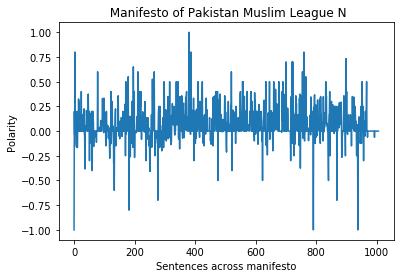

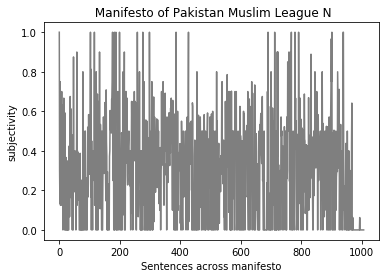

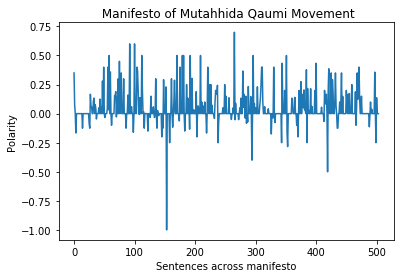

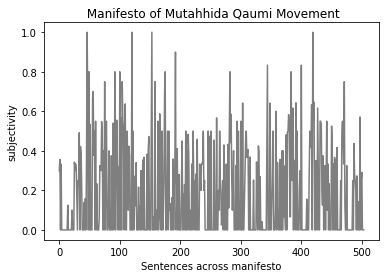

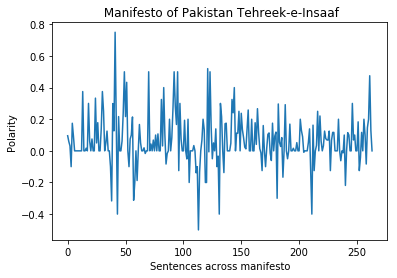

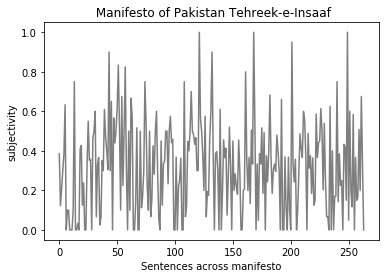

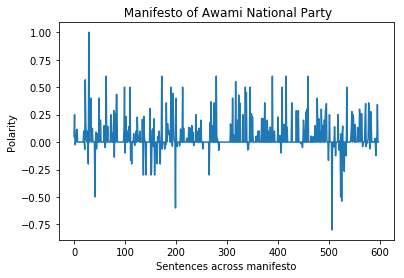

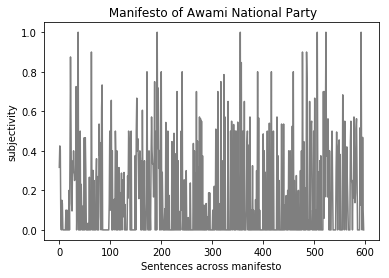

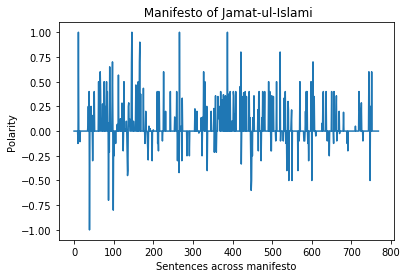

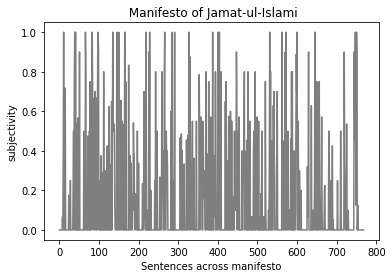

In [172]:
# Shows polarity and subjectivity of each manifesto from first sentence to last sentence
for party in list_of_parties:
    sentiment_analysis (party.sentence_tokens, party.name)

### MANIFESTO SUMMARIZATION

For the average Pakistani voter, reading large manifestos might be an arduous and time consuming affair. In most cases, these documents are not read thoroughly. As such, a summary would be quite useful in helping voters understand key party positions and policies. 
The summarize_text function uses 20% of the text in the manifesto for its summary. 

In [198]:
# Prints a summary of each party's manifesto using 20% of the sentences in that manifesto
for party in list_of_parties:
    print (party.name + ' Manifesto Summary')
    print ('\n \n')
    summarize_text (party.text)
    print ('\n \n \n \n \n \n \n ')

Pakistan Peoples Party Manifesto Summary

 

As we shepherd Pakistan into its first constitutional transfer of power through elections, we resolve today that we will continue to make history by using a new elected term in office to take Pakistan into a future based on social justice, peace and prosperity for all.
Our 2008 term was used to preserve and strengthen the federation by building a new social contract for Pakistan and devolving power to the provinces.
The President, Asif Ali Zardari, voluntarily gave away his own powers to the head of Parliament, empowering the people and investing in a future where the public good trumps politics.
We no longer even remind people of the jail terms and the extra-judicial executions this party has faced; today, the PPPP still stands as the most accountable party and government in the history of Pakistan.
We did all this while giving Pakistan its first non-partisan, non-politicized social safety net for the poor and vulnerable, while protecting l

This is challenge to our very existence and if we are to survive as a nation and are to translate our dreams about Pakistan into reality, we shall have to grapple with the problems facing us with redoubled zeal and energy.
Poor governance, deteriorating law and order situation, repeated breaches of sovereignty, widespread corruption, galloping inflation, unprecedented load shedding, massive unemployment and increasing poverty have left the citizens in a vicious cycle of pain and suffering.
The challenge ahead of us is not only to re-establish the supremacy of law and ensure respect for democratic institutions, but to create a society that is based on social justice and ensures the well-being of all Pakistanis without any discrimination.
We are here to revive the confidence of people by instilling hope and restoring national dignity and laying foundation for a sustainable growth and development.
This is to be achieved by means of socio-economic development, generating opportunities and 

MQM is the only political party in Pakistan which represents and comprises of ninety eight percent working, middle class and poor masses of the country who are presently down trodden, disadvantaged and exploited by the two percent ruling elite.
MQM has revolutionised politics in Pakistan its elected representatives and office bearers are chosen by ordinary party members/workers and people on merit from constituents level not by virtue of being born in a feudal family or political dynasty.
Due to this obsolete system a genuine democracy could not establish in the country and the people of Pakistan could not get their due rights, social justice, equal opportunities, rule of law and real participation in the affairs of the state.
MQM is struggling to abolish this obsolete system and introduce participatory democracy, merit based bureaucracy and independent judiciary wherein the State shall promote social and economic wellbeing of the people in order to establish a truly democratic, progre

We look to the future with hope and confidence as we set Pakistan on a course to political stability, social harmony, and economic prosperity for all.
The PTI is determined to provide a credible new leadership that can restore Pakistan's political and economic sovereignty through building a new bond of trust between the government and the people.
Only through the active participation of the people can we collectively mobilize our human and material resources to forge ahead on the road to a confident and self-reliant nation.
The present dismal state of women and children in terms of their access to health care, nutrition, and education can not be ignored.
Investment in women and children would ensure that the family structure remains intact and future generations are brought up in a healthy and secure environment.
Whilst establishing the rule of law and ensuring protection of human rights through an independent and honest judiciary, strive for the social development and economic prosper

the Awami National Party (ANP) so that voters in the forthcoming General Elections
Labour Rights and Development
The Awami National Party (ANP) draws its inspiration from the example and
In keeping with this spirit, the ANP, like its predecessors, the NAP (National Awami
the eradication of poverty and ignorance, the protection of all basic human rights and
The ANP firmly believes in peace and non violence and stands against extremism
The ANP is for equal opportunities for all citizens without discrimination and bias.
The ANP is committed to securing for all the federating units of Pakistan their full
political social and economic rights as equal partners in the federation and their full
forces in Pakistan and to subscribe to partnerships with all peace loving countries of
The ANP considers extremism and terrorism a threat to the very existence of the
will not let the sacrifices of the people of Pakistan, security agencies and especially
ANP is committed to evolve a national consensus t

Jamaat—e-lslami Pakistan
Jamaat-e-Islami Pakistan
Jamaat-e-Islami Pakistan
Jamaat-e-Islami Pakistan
Maulane Abdul Haq Heehmi
Ia Syed Munewer Heeah, Ameer Jamaet—e—Ieiem Pakistan, Launched
2 THE ISLAMIC STATE AT MADINA
Pakistan is passing through the worst phase ef its history.
fundamental need ef a seeiety, is elusiye; erirnes, murders anti kidnappings are
Railways, and Pakistan Steel Mills are piling up huge losses.
ironically, law-enfereen'ient agencies haye became a threat to the litres and
Our rulers haye turned the army on its own people
Pakistan's seyereighty and are freely carrying eut their activities inside the eeuntry.
testiﬁes that the rise and the fall of nations depends en their leadership.
leadership laeits integrity, sincerity, and respect fer law, even the best laws and
preyides a pre—peeple geyernment and dispenses justice, but it also leads people to
Voters are fully respcnsihle fer bringing leaders — gccd or bad — ta pcwe r.
pcwer anti perscnal interests, Whereas.
on